In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    SkyModel,
)
from gammapy.estimators import FluxPoints
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.modeling import Fit

In [3]:
from astropy.io import ascii
# from astropy.table import Table

In [4]:
import os
import sys
import importlib

module_path = os.path.abspath('modules/spectral_models')
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
import spectral_models
importlib.reload(spectral_models)
from spectral_models import pwl_model

# module_path = os.path.abspath('modules/utilities')
# if module_path not in sys.path:
#     sys.path.append(module_path)
# # print(module_path)
# import utilities
# importlib.reload(utilities)
# from utilities import mkdir_base_child, plt_savefig

/home/gamma/Documents/GitHub/gammapy/gammapy-notebooks/0.20.1/simulations/LHAASO/modules/spectral_models


In [36]:
def print_flux():
    ax = plt.subplot()
    ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

    kwargs = {"ax": ax, "sed_type": "e2dnde"}

    for d in dataset:
        d.data.plot(label=d.name, **kwargs)
    energy_bounds = [1e-1, 1e2] * u.TeV
    title = f"{LHAASO_name}:  {src_name}"
    ax.set_title(title)
    ax.legend(loc="best")
    ax.set_ylim(1e-16, 1e-9)
    ax.set_xlim(energy_bounds)
    ax.legend()

    file_name = LHAASO_id+"_"+src_id
    plt.savefig(file_name, bbox_inches='tight')
    # path_flux = mkdir_base_child("analysis", "flux_points")

    # plt_savefig(path_flux, "flux_points")
    return 

In [7]:
dict_model = {
    "pwl": pwl_model(),
#   "logp": logp_model(),
#   "ecpl": ecpl_model()    
}

In [8]:
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()
catalog_2hwc = CATALOG_REGISTRY.get_cls("2hwc")()
catalog_3fgl = CATALOG_REGISTRY.get_cls("3fgl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_2fhl = CATALOG_REGISTRY.get_cls("2fhl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_3hwc = CATALOG_REGISTRY.get_cls("3hwc")()
catalog_3hwc

In [9]:
TeVCount_dict = {
    "LHAASO J1825-1326": ["HESS J1825-137", "HESS J1826-130", "2HWC J1825-134"], 
    "LHAASO J1908+0621": ["MGRO J1908+06", "HESS J1908+063", "2HWC J1908+063"], 
    "LHAASO J2226+6057": ["VER 2226+608", "Boomerang"]
}

In [10]:
# TeVCount_dict[LHAASO]

In [11]:
# range(len(TeVCount_dict[LHAASO]))

In [12]:
# range(len(catalog_tag))

In [13]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

for i in range(len(TeVCount_dict.keys())):
    LHAASO = list(TeVCount_dict.keys())[i]
    print(f"{LHAASO}")

    for j in range(len(TeVCount_dict[LHAASO])):
        TeVCount=TeVCount_dict[LHAASO][j]
        print(f"{TeVCount}")
        for k in range(len(catalog_tag)): 
            try:
                cat_name = catalog_tag[k]
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[TeVCount]
                print(f"{catalog_tag[k]}")

            except:
                 print(f"{catalog_tag[k]} (an exception occurred)")
    print(" ")
    print("***")


LHAASO J1825-1326
HESS J1825-137
gamma-cat
hgps
2hwc (an exception occurred)
3fgl
4fgl
2fhl
3fhl
3hwc (an exception occurred)
HESS J1826-130
gamma-cat
hgps
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl
2fhl (an exception occurred)
3fhl
3hwc (an exception occurred)
2HWC J1825-134
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
 
***
LHAASO J1908+0621
MGRO J1908+06
gamma-cat
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl
4fgl
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
HESS J1908+063
gamma-cat
hgps
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
2HWC J1908+063
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc


In [14]:
base_dir  = "flux_points"
child_dir = "catalog"
format_file = ".dat"

LHAASO_name = list(TeVCount_dict.keys())[0]
src_name =  list(TeVCount_dict.values())[0][2]



for i in range(len(TeVCount_dict.keys())):
    LHAASO_name = list(TeVCount_dict.keys())[i]
    print(f"{LHAASO_name}")

    for j in range(len(TeVCount_dict[LHAASO_name])):
        src_name=TeVCount_dict[LHAASO_name][j]
        
        LHAASO_id = LHAASO_name.replace(" ", "")
        src_id = src_name.replace(" ", "")

        print(f"{src_name}")
        for k in range(len(catalog_tag)): 
            
            try:
                cat_name = catalog_tag[k]
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[src_name]
  
                ds = FluxPointsDataset(
            #             spectral_model=src.spectral_model,
                    data=src.flux_points, 
                    name=cat_name
                )
                table = ds.data.to_table(sed_type="dnde", formatted=True)



#                 file_name = f'{src_id}_{base_dir}_{cat_name}{format_file}'
#                 mkdir_base_child(base_dir, child_dir)

                path_name = os.path.abspath(os.path.join(f"{base_dir}/{child_dir}/{file_name}"))
                # print(path_name)
                if path_name not in sys.path:
                    sys.path.append(path_name)

                table.write(f"{path_name}",format='ascii.ecsv', overwrite=True)

        
                print(f"{catalog_tag[k]}")

            except:
                 print(f"{catalog_tag[k]} (an exception occurred)")
    print(" ")
    print("***")


LHAASO J1825-1326
HESS J1825-137
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
HESS J1826-130
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
2HWC J1825-134
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
 
***
LHAASO J1908+0621
MGRO J1908+06
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an 

In [15]:
    for i  in range(len(catalog_tag)): 
        try:
            cat_name = catalog_tag[i]
            cat=CATALOG_REGISTRY.get_cls(cat_name)()
            src=cat[src_name]

        except:
            print(f"********An exception occurred: {catalog_tag[i]}********")

# for key, value in TeVCount_dict.items():
#     LHAASO.append(key)
#     TeVCount.append(value)
# print(LHAASO, TeVCount)

# cat=CATALOG_REGISTRY.get_cls(cat_name)()
#         src=cat[src_name]
    

********An exception occurred: gamma-cat********
********An exception occurred: hgps********
********An exception occurred: 2hwc********
********An exception occurred: 2fhl********
********An exception occurred: 3fhl********
********An exception occurred: 3hwc********


In [16]:
LHAASO = []
TeVCount = []

for key, value in TeVCount_dict.items():
    LHAASO.append(key)
    TeVCount.append(value)
print(LHAASO, TeVCount)

['LHAASO J1825-1326', 'LHAASO J1908+0621', 'LHAASO J2226+6057'] [['HESS J1825-137', 'HESS J1826-130', '2HWC J1825-134'], ['MGRO J1908+06', 'HESS J1908+063', '2HWC J1908+063'], ['VER 2226+608', 'Boomerang']]


In [25]:
LHAASO_name = list(TeVCount_dict.keys())[0]
src_name =  list(TeVCount_dict.values())[0][1]

LHAASO_id = LHAASO_name.replace(" ", "")
src_id = src_name.replace(" ", "")

In [26]:
LHAASO_name, LHAASO_id

('LHAASO J1825-1326', 'LHAASOJ1825-1326')

In [27]:
src_name, src_id

('HESS J1826-130', 'HESSJ1826-130')

In [28]:
# CATALOG_REGISTRY.get_cls("2hwc")()["HESS J1908+063"]

In [38]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

catalog = []
catalog_name = []
source = []
spatial_model = []
spectral_model = []
sky_model = []
dataset = []
for i  in range(len(catalog_tag)): 
    try:
        cat_name = catalog_tag[i]
        cat=CATALOG_REGISTRY.get_cls(cat_name)()
        src=cat[src_name]

        ds = FluxPointsDataset(
#             spectral_model=src.spectral_model,
            data=src.flux_points, 
            name=cat_name
        )
        table = ds.data.to_table(sed_type="dnde", formatted=True)
        (table)
        
        base_dir  = "flux_points"
        child_dir = "catalog"
        format_file = ".dat"


#         file_name = f'{src_id}_{base_dir}_{cat_name}{format_file}'
#         mkdir_base_child(base_dir, child_dir)

        path_name = os.path.abspath(os.path.join(f"{base_dir}/{child_dir}/{file_name}"))
        # print(path_name)
        if path_name not in sys.path:
            sys.path.append(path_name)

        table.write(f"{path_name}",format='ascii.ecsv', overwrite=True)

        
        
        catalog.append(cat)
        source.append(src)
        spectral_model.append(src.spectral_model)
        spatial_model.append(src.spatial_model)
        sky_model.append(src.sky_model)
        catalog_name.append(cat_name)
        dataset.append(ds)

        
    except:
        print(f"********An exception occurred: {catalog_tag[i]}********")

********An exception occurred: gamma-cat********
********An exception occurred: hgps********
********An exception occurred: 2hwc********
********An exception occurred: 3fgl********
********An exception occurred: 4fgl********
********An exception occurred: 2fhl********
********An exception occurred: 3fhl********
********An exception occurred: 3hwc********


In [39]:
spectral_model

[]

In [33]:
dataset = Datasets(dataset)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: only dimensionless scalar quantities can be converted to Python scalars

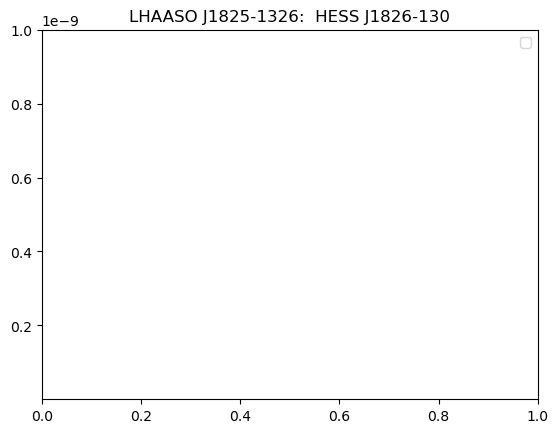

In [34]:
print_flux()

In [ ]:
# ax = plt.subplot()
# ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

# kwargs = {"ax": ax, "sed_type": "e2dnde"}

# for d in dataset:
#     d.data.plot(label=d.name, **kwargs)
# energy_bounds = [1e-5, 1e3] * u.TeV
# title = f"{LHAASO_name}:  {src_name}"
# ax.set_title(title)
# ax.legend(loc="best")
# ax.set_ylim(1e-13, 1e-9)
# ax.set_xlim(energy_bounds)
# ax.legend()

# file_name = LHAASO_id+"_"+src_id
# plt.savefig(file_name, bbox_inches='tight')
# # path_flux = mkdir_base_child("analysis", "flux_points")

# # plt_savefig(path_flux, "flux_points")

In [ ]:
# print_flux()